In [1]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [38]:
# ground truth model
N, R = 20, 3
factors = [np.random.randn(N, R) for _ in range(3)]
factors[2] = np.random.randn(N, 1).dot(np.random.randn(1, R))

# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
data += 0.1*np.random.randn(*data.shape) # add noise

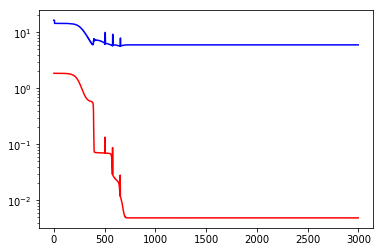

In [43]:
from tensortools import lowrank_cpfit

est_factors, info = lowrank_cpfit(data, R, [0, 0, 1e-3], lr=1e-4, niter=1000)
plt.plot(info['obj_hist'], '-b')
plt.plot(info['loss_hist'], '-r')
plt.yscale('log')

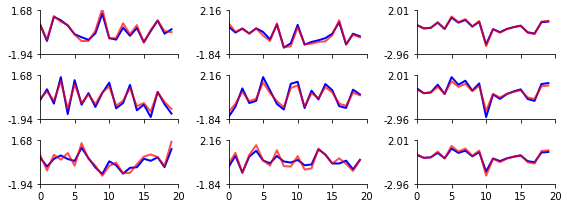

In [44]:
from tensortools import align_factors, plot_factors
est_factors, factors, score = align_factors(est_factors, factors)
fig, ax, po = plot_factors(est_factors, line_kw=dict(lw=2, c='b'))
fig, ax, po = plot_factors(factors, line_kw=dict(lw=2, c='r', alpha=0.7), fig=fig)

In [36]:
u,s,v = np.linalg.svd(est_factors[2])

In [37]:
s

array([ 4.77302371,  4.4242188 ,  3.65969505])